In [1]:
import boto3, os, sagemaker
from sagemaker import get_execution_role

iam_role = get_execution_role()

my_region = boto3.Session().region_name

sm_session = sagemaker.session.Session(boto3.Session())

print("Success")

Success


In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

adult = pd.read_csv("s3://bigdatabhawna/finalproject/adult.data", header=None, delimiter=r",\s+")
adult.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
cols = {
    "age": "continuous",
    "workclass": "Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked",
    "fnlwgt": "continuous",
    "education": "Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool",
    "education-num": "continuous",
    "marital-status": "Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse",
    "occupation": "Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces",
    "relationship": "Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried",
    "race": "White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black",
    "sex": "Female, Male",
    "capital-gain": "continuous",
    "capital-loss": "continuous",
    "hours-per-week": "continuous",
    "native-country": "United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands",
    "income": ">50K, <=50K",
}

with open('cols_dict.pickle', 'wb') as f:
    pickle.dump(cols, f, protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
cols_dict = pickle.load(open('cols_dict.pickle', 'rb'))

In [5]:
adult.columns = [cols for cols in cols_dict.keys()]

In [6]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
dtypes = {
    "age": int,
    "workclass": str,
    "fnlwgt": int,
    "education": str,
    "education-num": int,
    "marital-status": str,
    "occupation": str,
    "relationship": str,
    "race": str,
    "sex": str,
    "capital-gain": int,
    "capital-loss": int,
    "hours-per-week": int,
    "native-country": str,
    "income": str
}

adult = adult.astype(dtypes)

In [8]:
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [9]:
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
for x in range(len(list(adult.columns))):
    print("{} number of missing values in column {}".format(sum((adult.iloc[:,x]).astype('str').str.contains('\?')), 
          list(adult.columns)[x]))

0 number of missing values in column age
1836 number of missing values in column workclass
0 number of missing values in column fnlwgt
0 number of missing values in column education
0 number of missing values in column education-num
0 number of missing values in column marital-status
1843 number of missing values in column occupation
0 number of missing values in column relationship
0 number of missing values in column race
0 number of missing values in column sex
0 number of missing values in column capital-gain
0 number of missing values in column capital-loss
0 number of missing values in column hours-per-week
583 number of missing values in column native-country
0 number of missing values in column income


In [11]:
for x in range(len(list(adult.columns))):
    if sum((adult.iloc[:,x]).astype('str').str.contains('\?')) != 0:
        adult = adult[~adult.iloc[:,x].str.contains("\?")]

In [12]:
for x in range(len(list(adult.columns))):
    print("{} number of missing values in column {}".format(sum((adult.iloc[:,x]).astype('str').str.contains('\?')), 
          list(adult.columns)[x]))

0 number of missing values in column age
0 number of missing values in column workclass
0 number of missing values in column fnlwgt
0 number of missing values in column education
0 number of missing values in column education-num
0 number of missing values in column marital-status
0 number of missing values in column occupation
0 number of missing values in column relationship
0 number of missing values in column race
0 number of missing values in column sex
0 number of missing values in column capital-gain
0 number of missing values in column capital-loss
0 number of missing values in column hours-per-week
0 number of missing values in column native-country
0 number of missing values in column income


In [13]:
len(adult)

30162

In [14]:
cols = list(adult.columns)
cols = [cols[-1]] + cols[:-1]
adult=adult[cols]


In [15]:
adult.head()

,income,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,<=50K,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,<=50K,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,<=50K,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,<=50K,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,<=50K,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


### XG Boost Classification

In [16]:
label = adult['income']
features = adult.drop(['income','fnlwgt'], axis = 1)

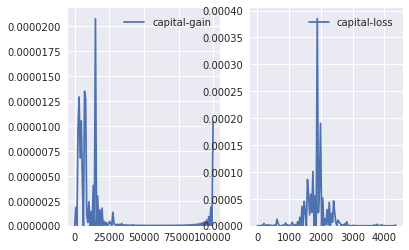

In [17]:
fig, axs = plt.subplots(ncols=2)
sns.kdeplot(features['capital-gain'], ax=axs[0])
sns.kdeplot(features['capital-loss'], ax=axs[1])
plt.show()

In [18]:
var = ['capital-gain', 'capital-loss']
features_new = pd.DataFrame(data = features)
features_new[var] = features[var].apply(lambda x: np.log(x + 1))

In [19]:
features_new = pd.get_dummies(features_new)

In [20]:
features_new.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,...,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,10.121312,0.743647,0.355226,40.931238,0.031265,0.068530,0.738877,0.035608,0.082853,...,0.001127,0.003614,0.000365,0.002354,0.001392,0.000564,0.000597,0.911876,0.002122,0.000530
std,13.134665,2.549995,2.470518,1.595010,11.979984,0.174035,0.252657,0.439254,0.185313,0.275664,...,0.033556,0.060007,0.019094,0.048461,0.037291,0.023734,0.024422,0.283480,0.046016,0.023026
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,16.000000,11.512925,8.379539,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(features_new,label,test_size = 0.2,random_state = 1234)  

print("Training set has {} samples.".format(X_train.shape[0])) 
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 24129 samples.
Testing set has 6033 samples.


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # default=(0, 1)
numeric = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

X_train[numeric] = scaler.fit_transform(X_train[numeric])
X_test[numeric] = scaler.fit_transform(X_test[numeric])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/ec2-u

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 a

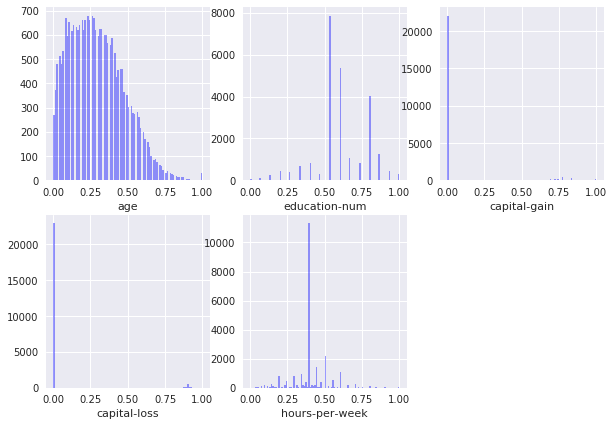

In [23]:
fig=plt.figure(figsize=(10,7))
columns = 3
rows = 2

for i in range(1, 6):
    fig.add_subplot(rows, columns, i)
    sns.distplot(X_train[numeric[i-1]], kde=False, bins=100, color="b")
plt.show()

In [24]:
y_train = y_train.map({'<=50K':0,'>50K':1})
y_test = y_test.map({'<=50K':0,'>50K':1})

In [25]:
features = X_train.columns

In [26]:
x_train = pd.DataFrame(X_train)
x_train['target'] = y_train

#x_test_df = pd.DataFrame(X_test)
#x_test_df['target'] = y_test

x_test = pd.DataFrame(X_test)
x_test['target'] = y_test

x_train.to_csv('train.csv')
x_test.to_csv('test.csv')

#x_test = x_test_df.values[:,1:]


In [27]:
bucket = "bigdatabhawna"

# send data to S3. SageMaker will take training data from s3
trainpath = sm_session.upload_data(
    path='train.csv', bucket=bucket,
    key_prefix='sagemaker/sklearncontainer')

testpath = sm_session.upload_data(
    path='test.csv', bucket=bucket,
    key_prefix='sagemaker/sklearncontainer')

In [28]:
!pip install xgboost

You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [29]:
%%writefile script.py

import argparse
import os

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics



# inference functions ---------------
def model_fn(model_dir):
    clf = joblib.load(os.path.join(model_dir, "model.joblib"))
    return clf



if __name__ =='__main__':

    print('extracting arguments')
    parser = argparse.ArgumentParser()

    # hyperparameters sent by the client are passed as command-line arguments to the script.
    # to simplify the demo we don't use all sklearn RandomForest hyperparameters
    parser.add_argument('--max_depth', type=int, default=5)
    parser.add_argument('--eta', type=float, default=.1)
    parser.add_argument('--gamma', type=int, default=4)
    parser.add_argument('--min_child_weight', type=int, default=2)
    #parser.add_argument('--num_class', type=int, default=3)
    #parser.add_argument('--num_round', type=int, default=10)
    
    # Data, model, and output directories
    parser.add_argument('--model-dir', type=str, default=os.environ.get('SM_MODEL_DIR'))
    parser.add_argument('--train', type=str, default=os.environ.get('SM_CHANNEL_TRAIN'))
    parser.add_argument('--test', type=str, default=os.environ.get('SM_CHANNEL_TEST'))
    parser.add_argument('--train-file', type=str, default='train.csv')
    parser.add_argument('--test-file', type=str, default='test.csv')
    #parser.add_argument('--features', type=str, default = (pd.read_csv(args.train_file).columns[:-1]) )  # in this script we ask user to explicitly name features
    #parser.add_argument('--target', type=str, default = (pd.read_csv(args.train_file).columns[-1])) # in this script we ask user to explicitly name the target

    args, _ = parser.parse_known_args()

    print('reading data')
    train_df = pd.read_csv(os.path.join(args.train, args.train_file))
    test_df = pd.read_csv(os.path.join(args.test, args.test_file))
    features = train_df.columns[:-1]
    target = train_df.columns[-1]
    
    print('building training and testing datasets')
    X_train = train_df[features]
    X_test = test_df[features]
    y_train = train_df[target]
    y_test = test_df[target]

    # train
    print('training model')
    model = xgb.XGBClassifier(max_depth=args.max_depth, 
                          eta=args.eta,
                          gamma=args.gamma,
                          min_child_weight=args.min_child_weight,
                          n_jobs=-1)
    
    model.fit(X_train, y_train)

    print('validating model')
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob[:,1], pos_label=1)
    print('AUC:{}'.format(metrics.auc(fpr, tpr)))
    
    results = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(results)

    print("Classification Report:")
    target_names = ['Lower Salary class', 'Higher Salary class']
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    # print couple perf metrics
    #for q in [10, 50, 90]:
    #    print('AE-at-' + str(q) + 'th-percentile: '
    #          + str(np.percentile(a=abs_err, q=q)))
        
    # persist model
    path = os.path.join(args.model_dir, "model.joblib")
    joblib.dump(model, path)
    print('model persisted at ' + path)
   #print(args.min_samples_leaf)


Overwriting script.py


In [30]:
! python script.py --eta .2 \
                   --gamma 3 \
                   --max_depth 5\
                   --min_child_weight 6\
                   --model-dir ./ \
                   --train ./ \
                   --test ./ \


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/distributed/config.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.update(yaml.load(text) or {})
extracting arguments
reading data
building training and testing datasets
training model
validating model
AUC:0.9232469921010595
Confusion Matrix:
[[4249  276]
 [ 518  990]]
Classification Report:
                     precision    recall  f1-score   support

 Lower Salary class       0.89      0.94      0.91      4525
Higher Salary class       0.78      0.66      0.71      1508

          micro avg       0.87      0.87      0.87      6033
          macro avg       0.84      0.80      0.81      6033
       weighted avg       0.86      0.87      0.86      6033

model persisted at ./model.joblib


In [31]:
from sklearn.externals import joblib


model_path = 'model.joblib'
print('Loading and predicting using model')
def model_fn(path):
    clf = joblib.load(path)
    return clf

clf = model_fn(model_path)
y_pred = clf.predict(pd.read_csv('test.csv').iloc[:,:-1])
y_prob = clf.predict_proba(pd.read_csv('test.csv').iloc[:,:-1])
y_prob = (pd.DataFrame(y_prob)).iloc[:,1]
y_true = y_test.values
print('Done')

Loading and predicting using model


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/distributed/config.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.update(yaml.load(text) or {})


Done


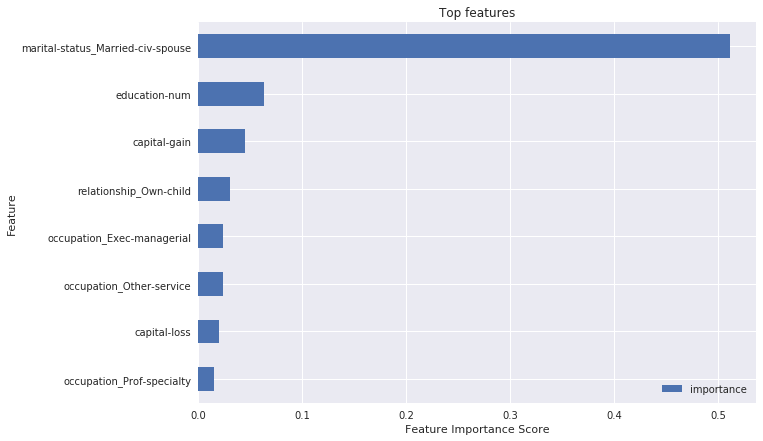

In [32]:
# Extract the feature importances using .feature_importances_ 
importances = clf.feature_importances_

# Plot
feat_imp = pd.DataFrame({'importance':importances})    
feat_imp['feature'] = pd.read_csv('test.csv').iloc[:,:-1].columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:8]
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title='Top features', figsize=(10,7))
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

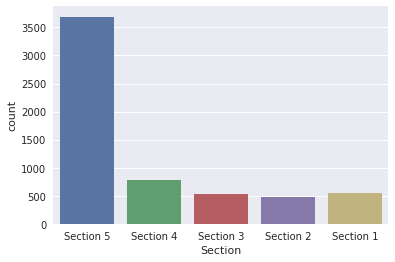

In [33]:
import seaborn as sns

individual_sections = pd.cut(y_prob,5, labels=["Section 5", "Section 4", "Section 3","Section 2","Section 1"])
output = pd.DataFrame(individual_sections)
output.columns = ["Section"]
sns.set(style="darkgrid")
ax = sns.countplot(x="Section", data=output)